In [1]:
import pandas as pd
df = pd.read_csv("gossip_combine.csv")
subdf = df[['title','class','sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]

# real news
df0 = subdf['class']==0
df0 = subdf[df0]
# fake news
df1 = subdf['class']==1
df1 = subdf[df1]

In [2]:
# no. of title with bad words in REAL news
bad0 = df0['bad_word']==0
bad0 = df0[bad0]
bad1 = df0['bad_word']==1
bad1 = df0[bad1]

print('Number of titles without bad words in real news:', len(bad0.index))
print('Number of titles with bad words in real news:', len(bad1.index))
print('Percentage of titles without bad words in real news: {:.2f}'.format((len(bad0.index)/len(df0.index))*100))
print('Percentage of titles with bad words in real news: {:.2f}'.format((len(bad1.index)/len(df0.index))*100))


Number of titles without bad words in real news: 16647
Number of titles with bad words in real news: 170
Percentage of titles without bad words in real news: 98.99
Percentage of titles with bad words in real news: 1.01


In [3]:
# no. of title with bad words in FAKE news
bad0 = df1['bad_word']==0
bad0 = df1[bad0]
bad1 = df1['bad_word']==1
bad1 = df1[bad1]

print('Number of titles without bad words in real news:', len(bad0.index))
print('Number of titles with bad words in real news:', len(bad1.index))
print('Percentage of titles without bad words: {:.2f}'.format((len(bad0.index)/len(df1.index))*100))
print('Percentage of titles with bad words: {:.2f}'.format((len(bad1.index)/len(df1.index))*100))

Number of titles without bad words in real news: 5279
Number of titles with bad words in real news: 44
Percentage of titles without bad words: 99.17
Percentage of titles with bad words: 0.83


In [4]:
count_real = len(df0.index)
count_fake = len(df1.index)
total = len(df.index)
print("percentage of real news is", (count_real/total)*100)
print("percentage of fake news is", (count_fake/total)*100)

percentage of real news is 75.95754290876242
percentage of fake news is 24.04245709123758


In [5]:
# logistic regression

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
x= subdf[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y= subdf[['class']]

In [7]:
######################## regression with ALL features #################################
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 70% of data = training, 30% = test, with random shuffling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
columns = x_train.columns

# logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.76


In [8]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5025    4]
 [1613    0]]


In [9]:
# MCC
m = confusion_matrix
TP = m[1][1];
TN = m[0][0];
FN = m[1][0];
FP = m[0][1];
MCC = (TP*TN-FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)));
print('MCC =', MCC)

MCC = -0.013902334621002757


In [10]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.548726
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.005     
Dependent Variable: class            AIC:              24313.5877
Date:               2019-08-28 19:56 BIC:              24377.6288
No. Observations:   22140            Log-Likelihood:   -12149.   
Df Model:           7                LL-Null:          -12212.   
Df Residuals:       22132            LLR p-value:      4.5557e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sp_count      -0.0040    0.0109  -0.3657  0.7146  -0.0253   0.0173
up_count       0.0286    0.0101   2.8322  0.0046   0.0088   0.

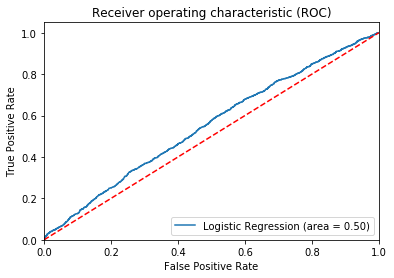

In [11]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [12]:
############### recursive features elimination with 4 features ###############
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

x= subdf[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y= subdf[['class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=4,step=1)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False  True False  True  True False False  True]
[5 1 2 1 1 3 4 1]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
print(columns)

Index(['sp_count', 'up_count', 'title_cha', 'title_word', 'cha_word', 'up_cha',
       'up_word', 'bad_word'],
      dtype='object')


In [14]:
## regression with top 4 "best" features ##
x= subdf[['up_count','title_word','cha_word','bad_word']]
y = subdf['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.76


In [15]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

m = confusion_matrix
TP = m[1][1];
TN = m[0][0];
FN = m[1][0];
FP = m[0][1];
MCC = (TP*TN-FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)));
print('MCC =', MCC)

[[5026    3]
 [1613    0]]
MCC = -0.012038868173435125


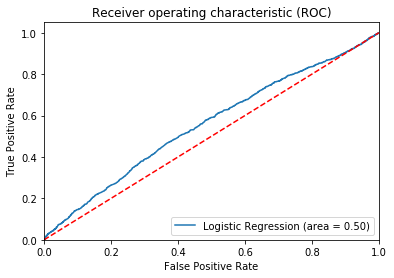

In [16]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [17]:
#######
# very bad results, even with recursive feature reduction, MCC is negative 
# so need to use SMOTE (resampling) to increase the portion of fake news
